# Evoked Potentials

In [160]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.io as sc

#### Function for calculating the ensemble average (given the number of epochs)

In [161]:
def ensemble_average(signal_samples, num_epoch):
    signal_samples = np.array(signal_samples[0:num_epoch])
    return np.mean(signal_samples, axis=0)

#### Function for jittering the signals

In [162]:
def jittered_sample(signal_samples, jitter_range_low, jitter_range_high):
    jitter_samples = []
    for i in range(0, len(signal_samples)):
        jitter_samples.append(np.roll(signal_samples[i], np.random.randint(jitter_range_low, jitter_range_high)))
    return jitter_samples

### (Optional) Function for Signal to Noise ratio for ensemble average signals

In [163]:
def SignalToNoiseRatio(data, num_epoch):
    data = np.array(data)
    signal = num_epoch*np.mean(data)
    noise = np.sqrt(num_epoch)*np.std(data)
    return signal/noise

## Signal simulation

#### Taking a composite sinusoidal signal

In [164]:
fs = 1000  # sampling frequency
t_start = -1
t_end = 1
time = np.arange(t_start,t_end,1/fs)
A_max = 2
freq = 1
wave1 = A_max*np.sin(2*np.pi*freq*time)
wave2 = 2*A_max*np.sin(2*np.pi*freq*3*time)
signal = wave1+wave2
np.shape(signal)

(2000,)

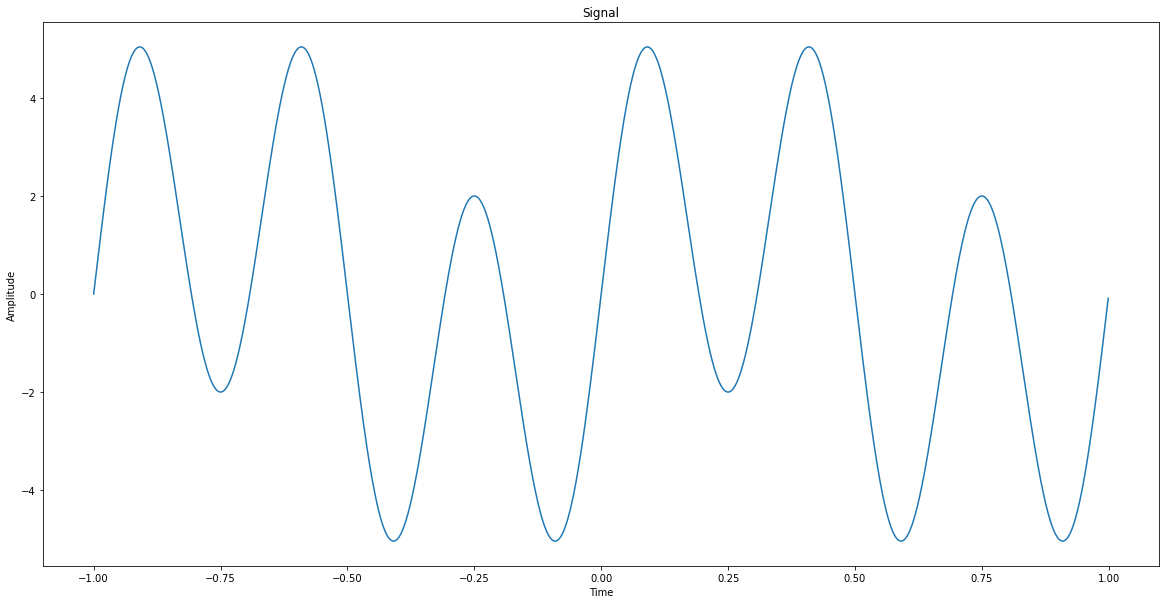

In [165]:
plt.figure(figsize= (20, 10))
plt.plot(time, signal)
plt.title("Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

#### White Noise
Here the noise follows normal distribution

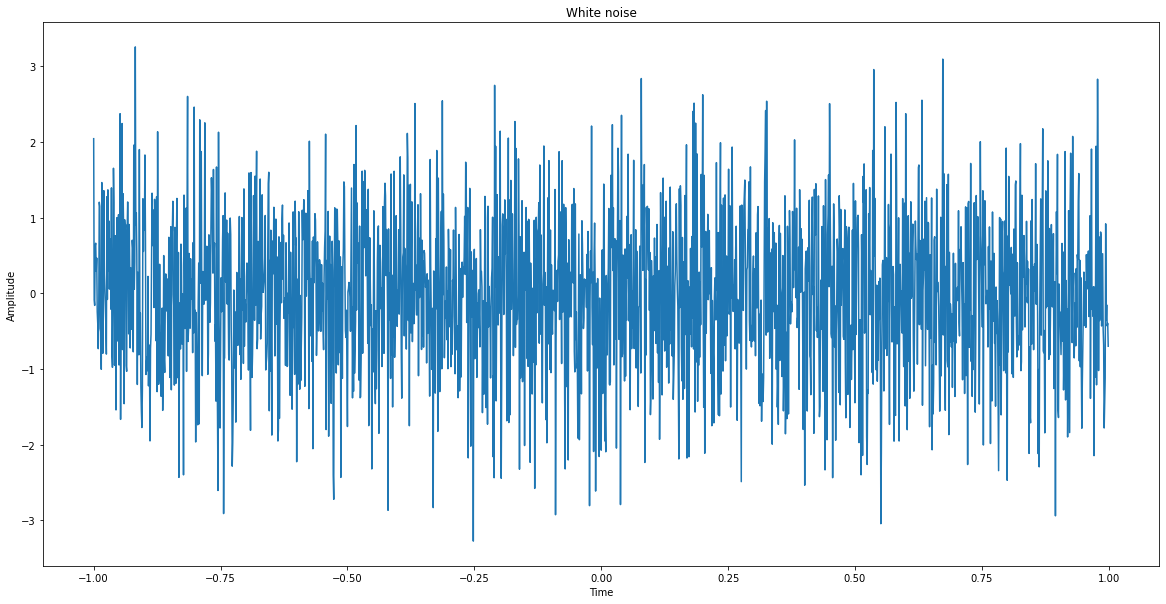

In [166]:
mean = 0
std = 1 
num_samples = len(time)
noise = np.random.normal(mean, std, size=num_samples)
plt.figure(figsize= (20, 10))
plt.plot(time, noise)
plt.title("White noise")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


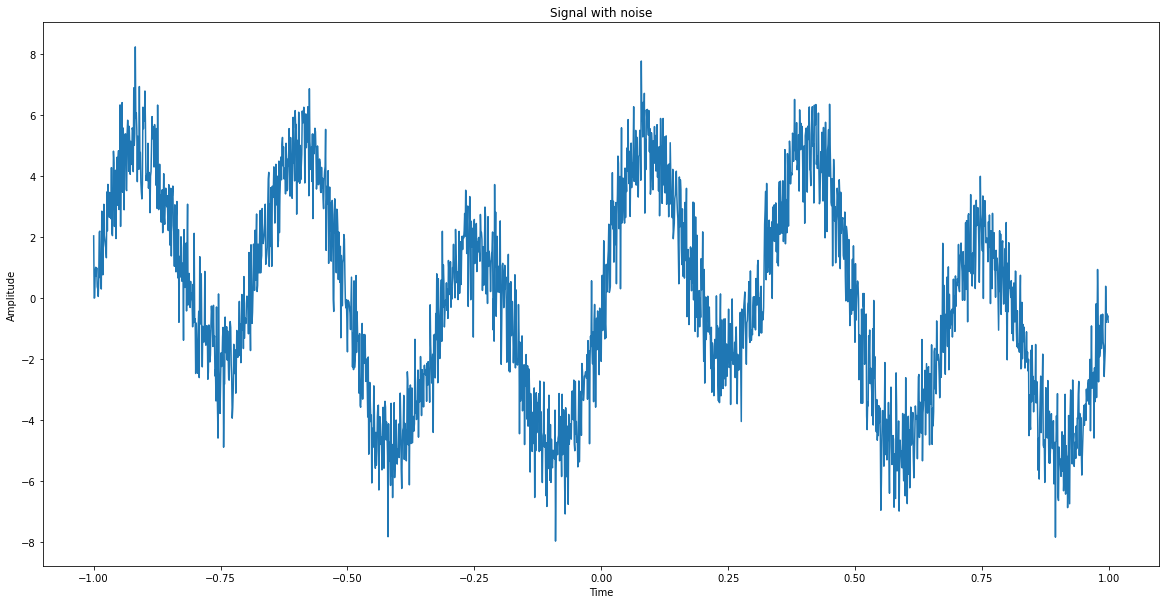

In [170]:
plt.figure(figsize= (20, 10))
plt.plot(time, signal+noise)
plt.title("Signal with noise")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

#### Generating signal with noise (random) for 300 epochs

In [171]:
signal_samples = []
noise_samples = []
num_epoch = 300
for i in range(0,num_epoch):
    mean = 0
    std = 1 
    num_samples = len(time)
    noise = np.random.normal(mean, std, size=num_samples)
    noise_samples.append(noise)
    signal_samples.append(signal+noise)

#### Ensemble Averaging of signals

We can see that we are able to retrieve original signal with ensemble averaging though it has a little bit of noise still present.
For decreasing the noise content we can increase the number of repetitions for ensemble averaging

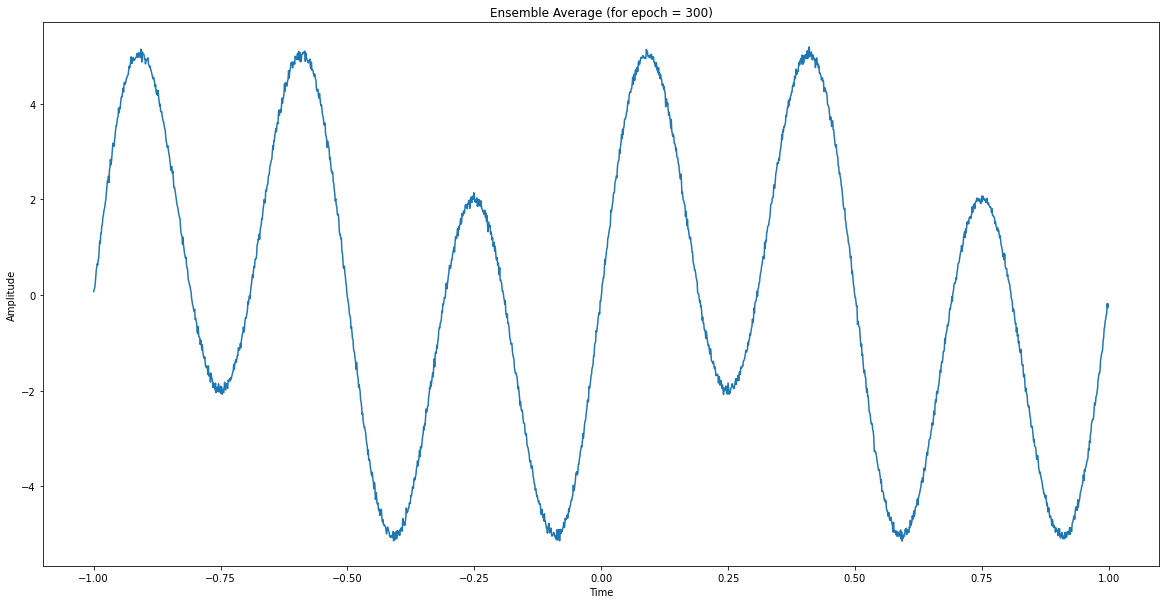

In [173]:
plt.figure(figsize= (20, 10))
plt.plot(time, ensemble_average(signal_samples, 300))
plt.title("Ensemble Average (for epoch = 300)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

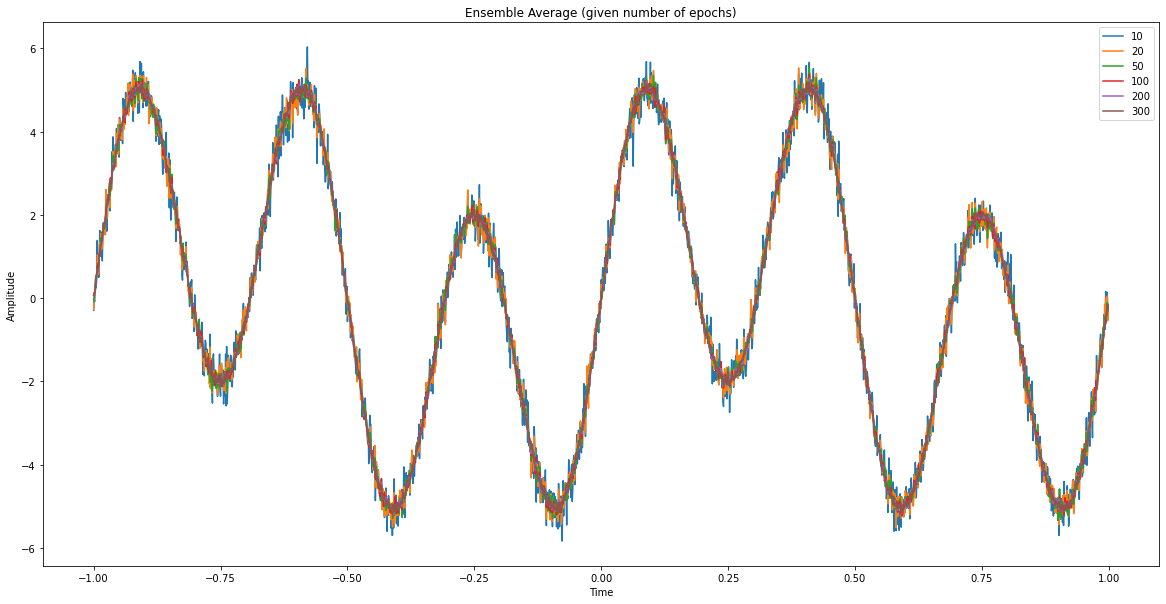

In [174]:
num_epoch = [10, 20, 50, 100, 200, 300]

plt.figure(figsize= (20, 10))
for i in range(0, len(num_epoch)):
    plt.plot(time, ensemble_average(signal_samples, num_epoch[i]), label=str(num_epoch[i]))
    plt.legend()
plt.title("Ensemble Average (given number of epochs)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

##### As we increase the number of epochs the quality of signal retrieved becomes better

#### Signal with high amplitude noise (random) for mutiple epochs and then doing ensemble averaging

In [175]:
signal_samples = []
noise_samples = []

num_epoch = 300

for i in range(0,num_epoch):
    mean = 0
    std = 1 
    num_samples = len(time)
    noise = 3*np.random.normal(mean, std, size=num_samples)
    noise_samples.append(noise)
    signal_samples.append(signal+noise)

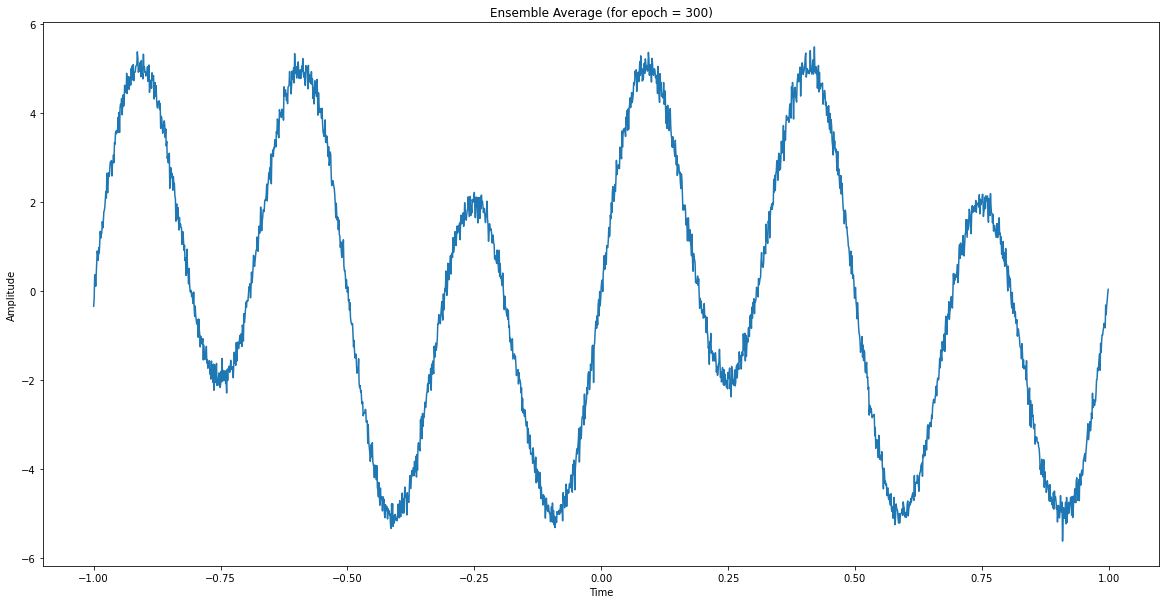

In [176]:
plt.figure(figsize= (20, 10))
plt.plot(time, ensemble_average(signal_samples, 300))
plt.title("Ensemble Average (for epoch = 300)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

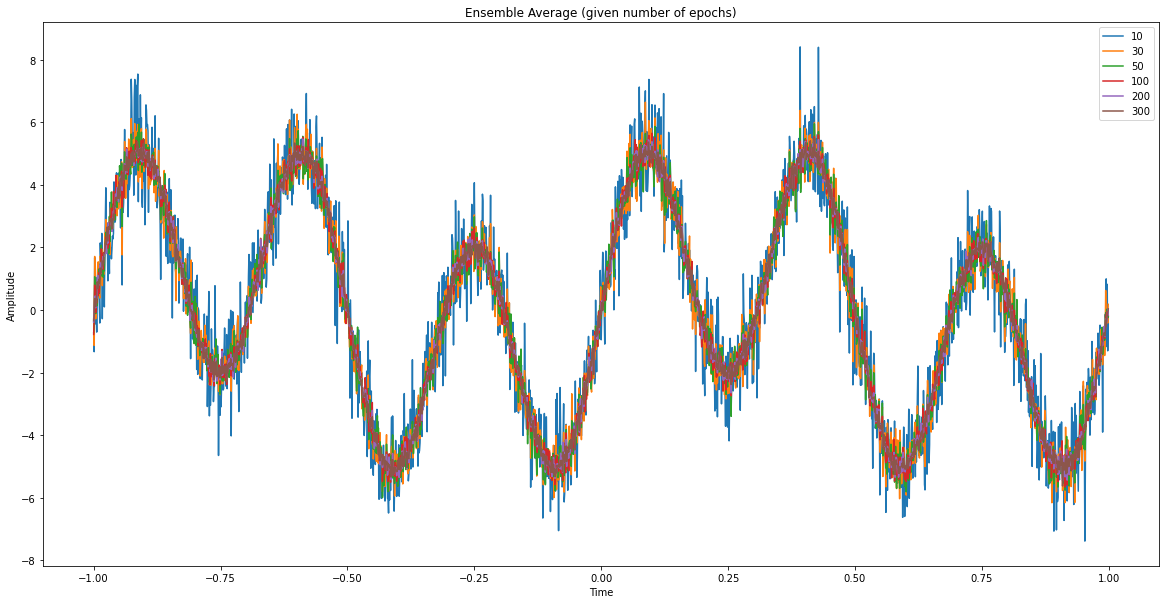

In [184]:
num_epoch = [10,30, 50, 100, 200, 300]

plt.figure(figsize= (20, 10))
for i in range(0, len(num_epoch)):
    plt.plot(time, ensemble_average(signal_samples, num_epoch[i]), label=str(num_epoch[i]))
    plt.legend()
plt.title("Ensemble Average (given number of epochs)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

With increase in the amplitude of noise the ensembled averaged signal posses more noise then for low amplitude noise while taking the same number of epochs. 

#### (Optional) Signal to Noise Ratio vs Number of epochs

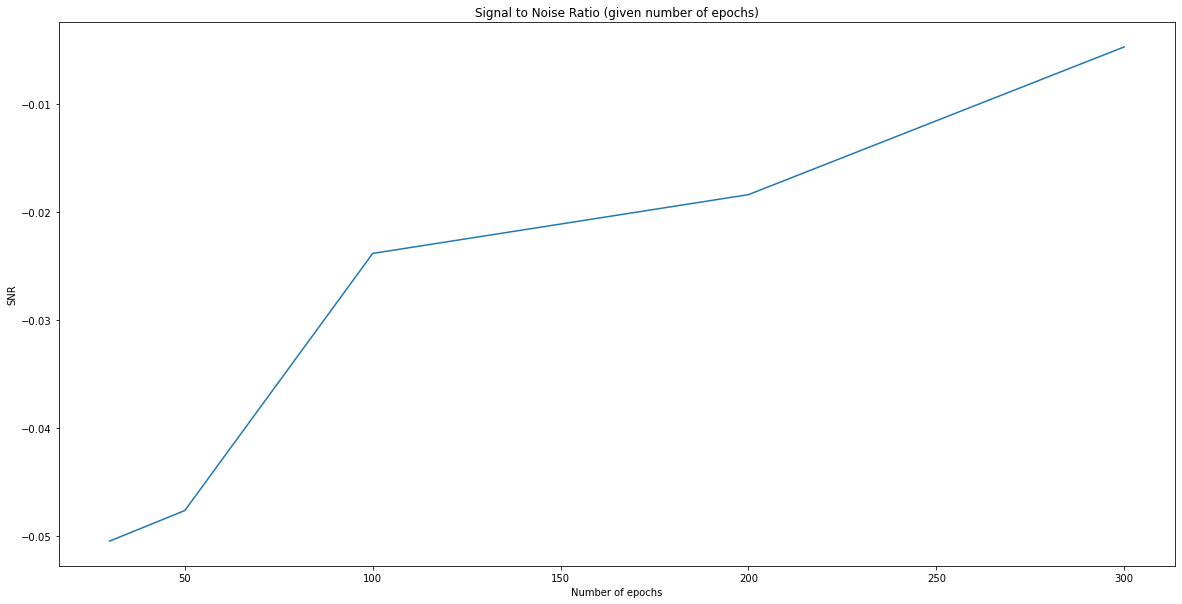

In [185]:
num_epoch = [30, 50, 100, 200, 300]
snr =[]
plt.figure(figsize= (20, 10))
for i in range(0, len(num_epoch)):
    snr.append(SignalToNoiseRatio(ensemble_average(signal_samples, num_epoch[i]), num_epoch[i]))
plt.plot(num_epoch, snr)
plt.title("Signal to Noise Ratio (given number of epochs)")
plt.xlabel("Number of epochs")
plt.ylabel("SNR")
plt.show()

### Adding latency jitter in signals

#### Jitter signal with random value between -3ms and 3ms

In [188]:
jittered_signal_samples = jittered_sample(signal_samples,-3,3)

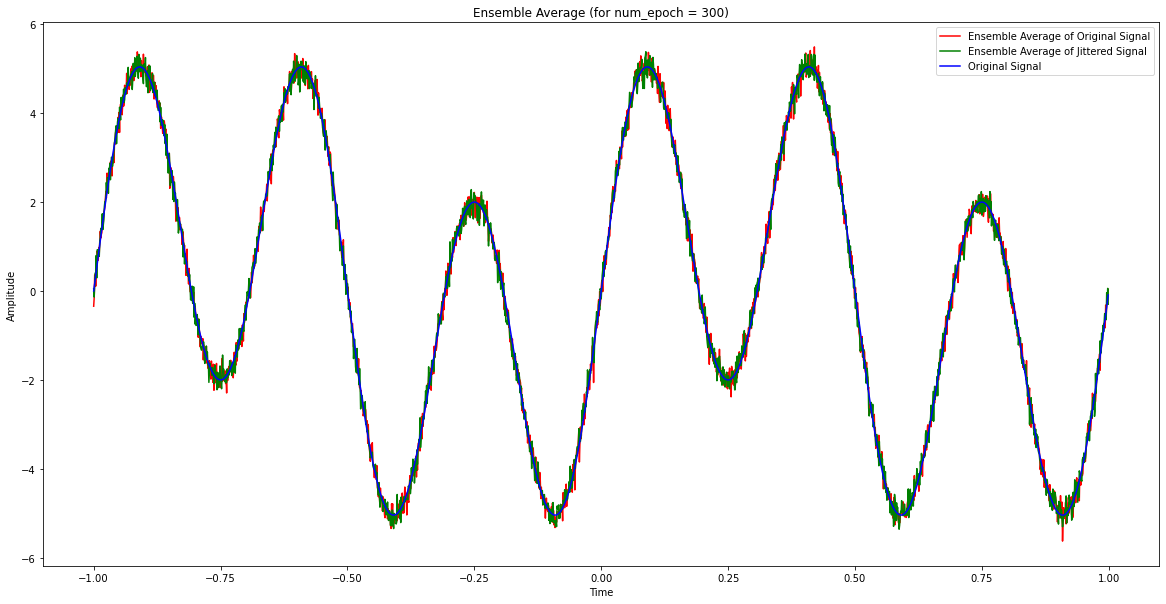

In [189]:
plt.figure(figsize= (20, 10))
plt.plot(time, ensemble_average(signal_samples, 300), 'r',label="Ensemble Average of Original Signal")
plt.plot(time, ensemble_average(jittered_signal_samples, 300),'g', label="Ensemble Average of Jittered Signal")
plt.plot(time,signal,'b', label="Original Signal")
plt.title("Ensemble Average (for num_epoch = 300)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

#### Jitter signal with value between -50ms and 50ms

In [193]:
jittered_signal_samples = jittered_sample(signal_samples,-50,50)

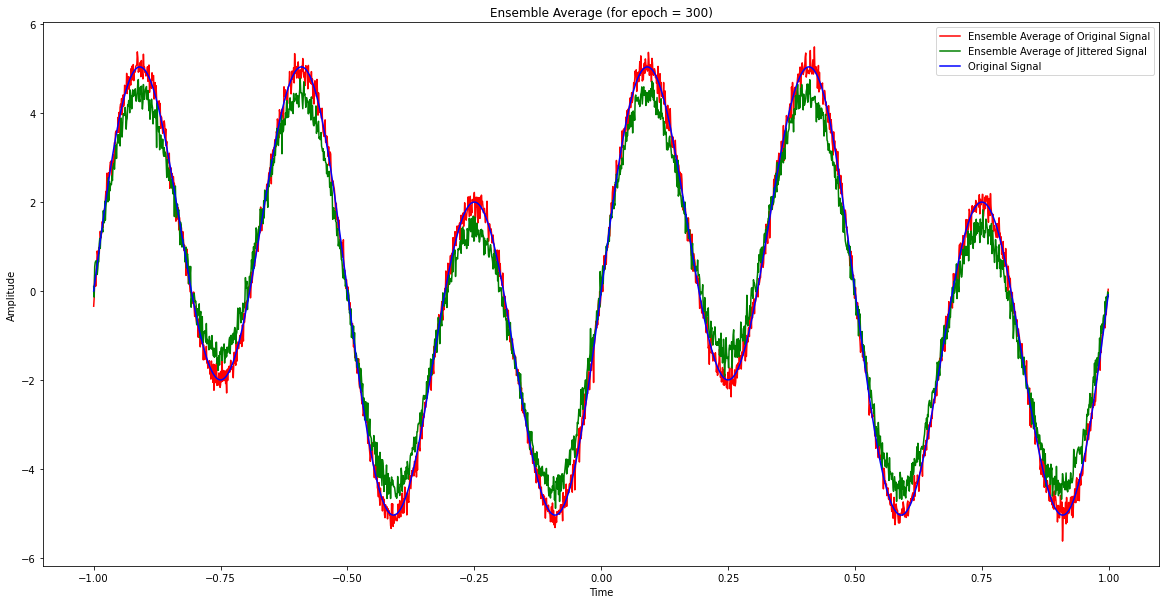

In [194]:
plt.figure(figsize= (20, 10))
plt.plot(time, ensemble_average(signal_samples, 300), 'r',label="Ensemble Average of Original Signal")
plt.plot(time, ensemble_average(jittered_signal_samples, 300),'g', label="Ensemble Average of Jittered Signal")
plt.plot(time,signal,'b', label="Original Signal")
plt.title("Ensemble Average (for epoch = 300)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

##### With jitter between -3ms and 3ms we didn't find much difference in original and jittered signal

##### But in case of jitter between -50ms and 50ms we observe that the **amplitude** of jittered signal is less than the original signal

### Real EP Data

In [195]:
epData = np.loadtxt('epData.csv', delimiter=',')

In [196]:
print(epData)
print(epData.shape)

[-1.2317  6.4889  3.0865 ...  2.8438 -5.1734  4.2089]
(512000,)


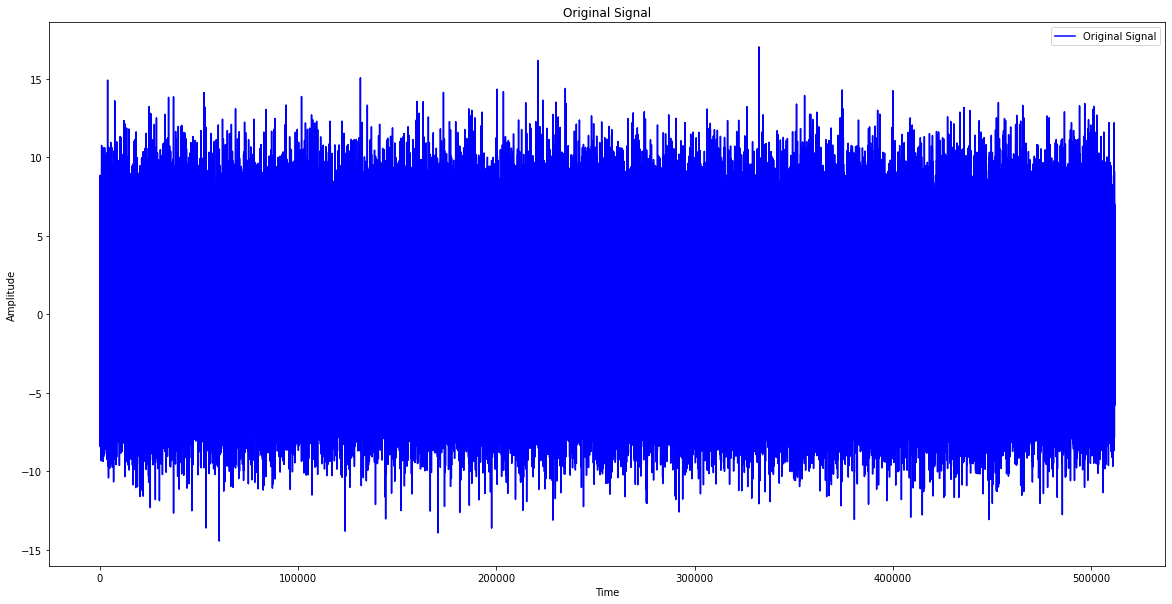

In [197]:
plt.figure(figsize= (20, 10))
plt.plot(epData,'b', label="Original Signal")
plt.title("Original Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In the above plot we can't see the original signal clear enough to retrieve some information

### Splitting the signals after each 160ms 
To get all the signals so that we can do the ensemble averaging

(1000, 512)


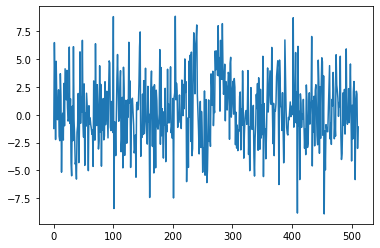

In [202]:
fs = 3200
interval =160e-3
time = np.arange(0, interval, 1/fs)
num_samples = epData.shape[0]/time.shape[0] 
sampled_epData = []
for i in range(0,1000):
    sampled_epData.append(epData[i*len(time):(i+1)*len(time)])

epochs =np.array(sampled_epData, dtype=np.float32)
print(epochs.shape)

No handles with labels found to put in legend.


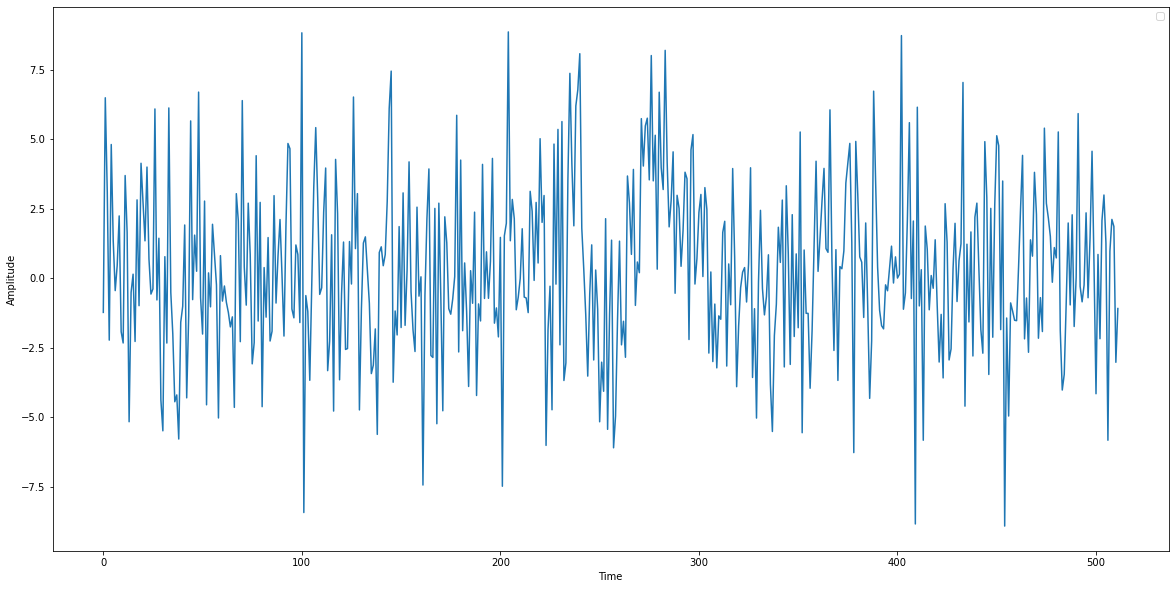

In [203]:
plt.figure(figsize= (20, 10))
plt.plot(epochs[0])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

##### In one epochs signal also we can't see any pattern. So we have to use ensemble average to remove noise.

#### Ensemble Averaging the signal samples
After ensemble averaging we can see the signal clearly and use it for deductions

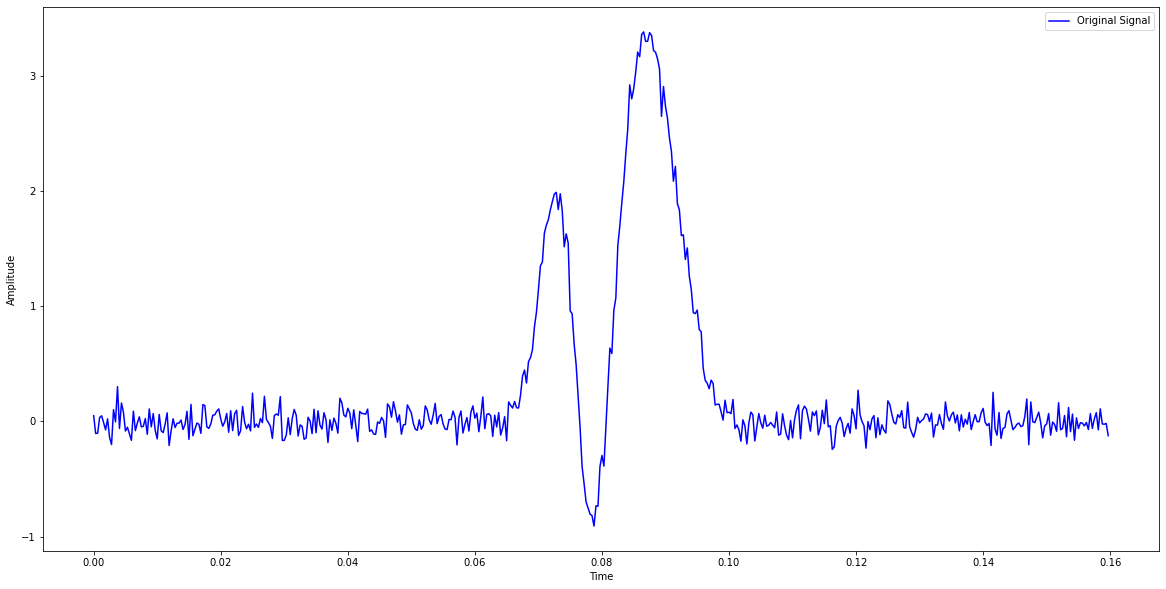

In [204]:
plt.figure(figsize= (20, 10))
plt.plot(time,ensemble_average(sampled_epData,1000),'b', label="Original Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

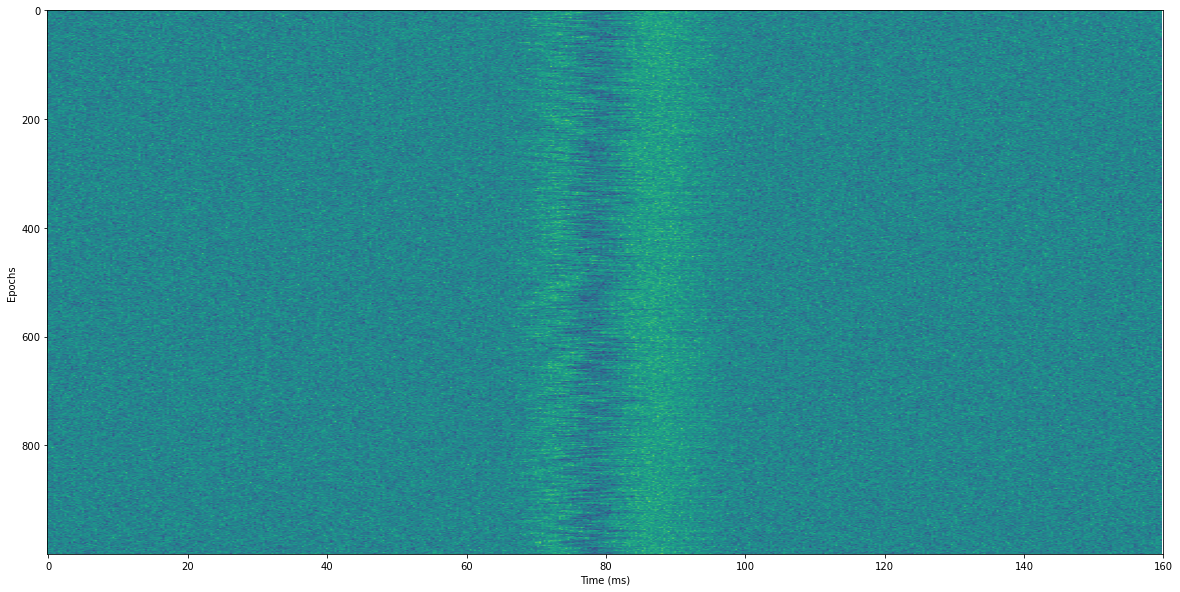

In [205]:
epochs = np.array(sampled_epData)
plt.figure(figsize= (20, 10))
plt.imshow(epochs,aspect='auto')
plt.axis('on')
plt.ylabel('Epochs')
plt.xlabel('Time (ms)')
plt.xticks([0,64,128,192,256,320,384,448,512],labels=['0','20','40','60','80','100','120','140','160'])
plt.show()

##### In the image plot we can see that in each epoch there is a signal( crest and trough) present around 80ms time.

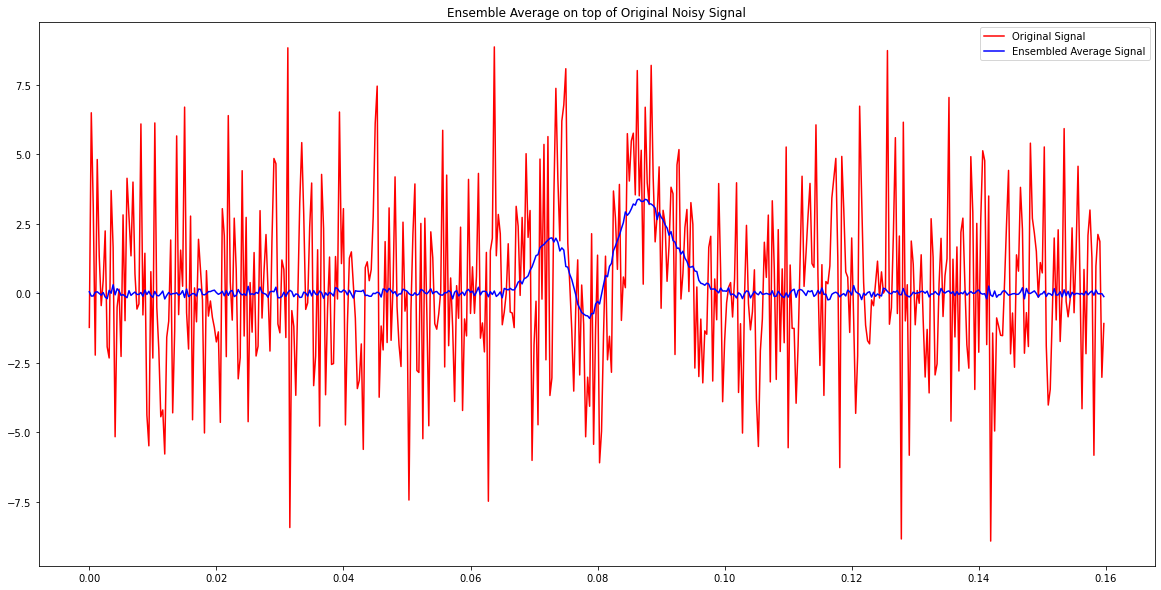

In [206]:
plt.figure(figsize= (20, 10))
plt.plot(time,sampled_epData[0],'r', label="Original Signal")
plt.plot(time,ensemble_average(sampled_epData,1000),'b', label="Ensembled Average Signal")
plt.title("Ensemble Average on top of Original Noisy Signal")
plt.legend()
plt.show()

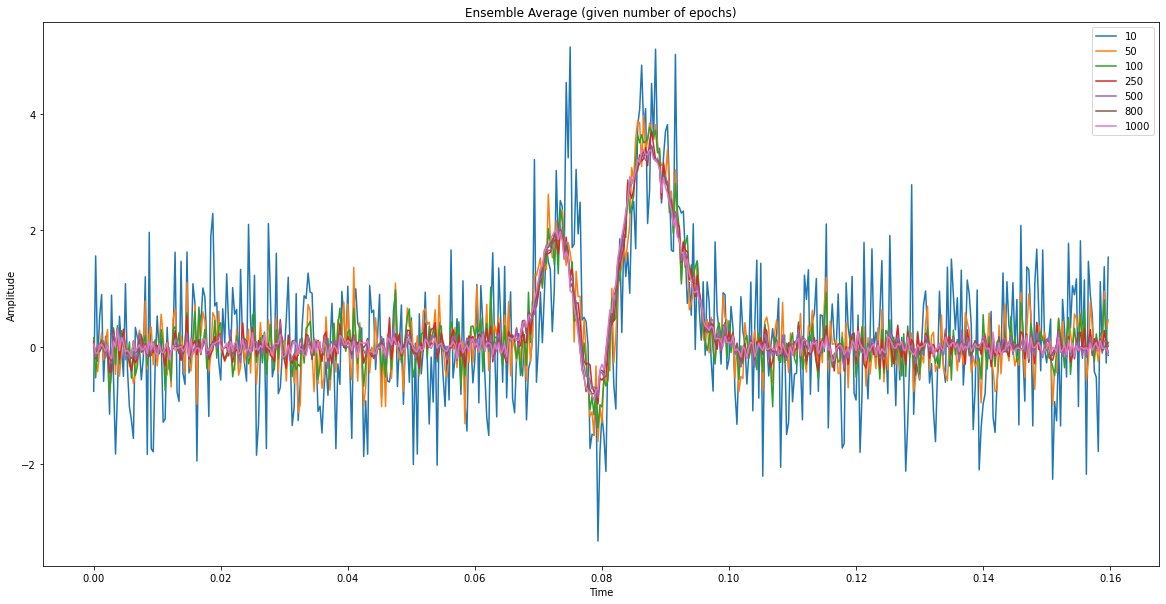

In [207]:
num_epoch = [10, 50, 100, 250, 500, 800, 1000]

plt.figure(figsize= (20, 10))
for i in range(0, len(num_epoch)):
    plt.plot(time, ensemble_average(epochs, num_epoch[i]), label=str(num_epoch[i]))
    plt.legend()
plt.title("Ensemble Average (given number of epochs)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

##### With increase in number of epochs the quality of obtained ensemble average signal improves


#### Getting the noise in each epoch by removing ensemble averaged signal

In [208]:
noise_samples = []
ensembled_average_signal = ensemble_average(epochs, 1000)
for i in range(0,1000):
    noise_samples.append(epochs[i]-ensembled_average_signal)
print(len(noise_samples))


1000


#### Getting the original signal in each epoch by removing noise

In [148]:
original_signal_samples = []
for i in range(len(noise_samples)):
    original_signal_samples.append(epochs[i]-noise_samples[i])
print(len(original_signal_samples))

1000


## Probability Density Functions

#### Function to normalise the data and bring it to scale of 0 to 1

In [209]:
def normalize(data):
    data = np.array(data)
    data = data - np.mean(data)
    data = data/(np.max(data)-np.min(data))
    return data

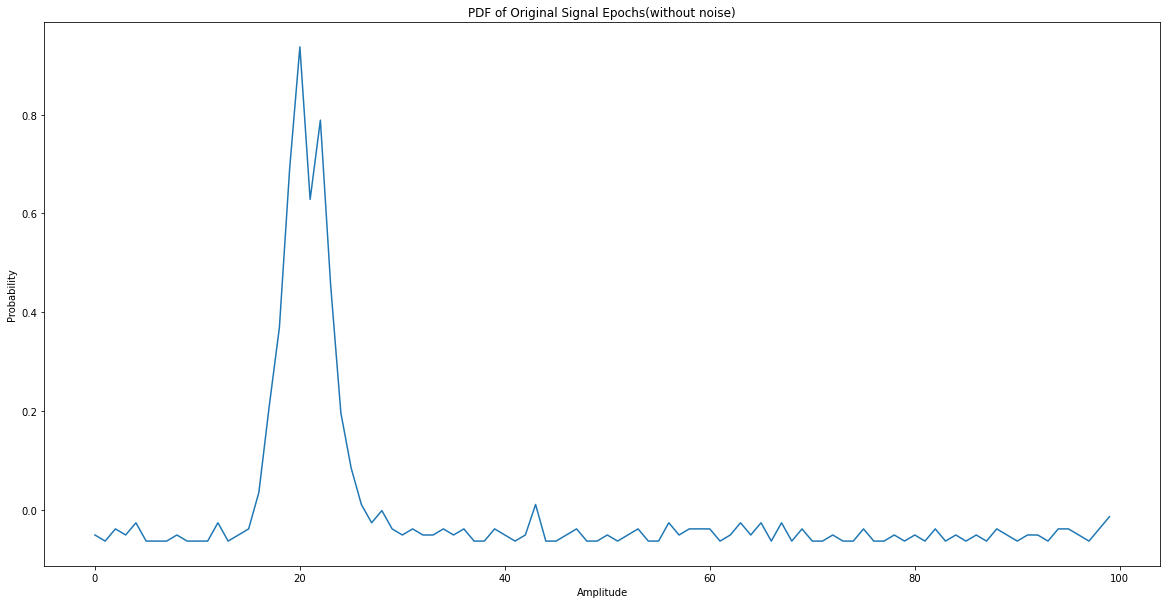

In [210]:
n1,bins=np.histogram((np.array(original_signal_samples).flatten()),bins=100)
plt.figure(figsize= (20, 10))
plt.plot(normalize(n1))
plt.xlabel('Amplitude')
plt.ylabel('Probability')
plt.title('PDF of Original Signal Epochs(without noise)')
plt.show()

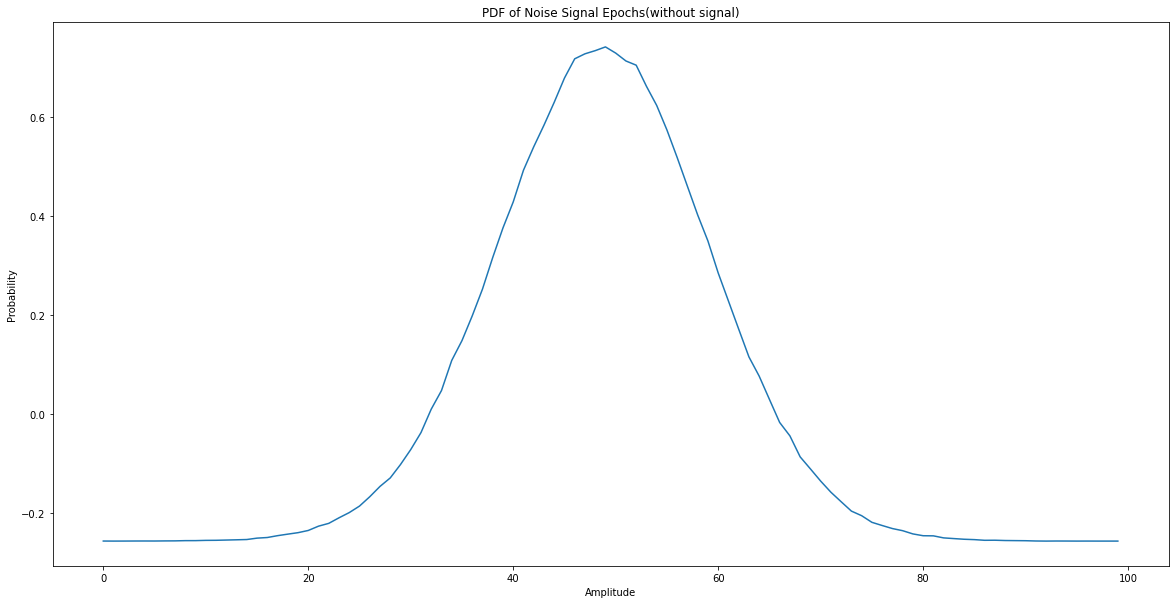

In [211]:
n2,bins=np.histogram((np.array(noise_samples).flatten()),bins=100)
plt.figure(figsize= (20, 10))
plt.plot(normalize(n2))
plt.xlabel('Amplitude')
plt.ylabel('Probability')
plt.title('PDF of Noise Signal Epochs(without signal)')
plt.show()

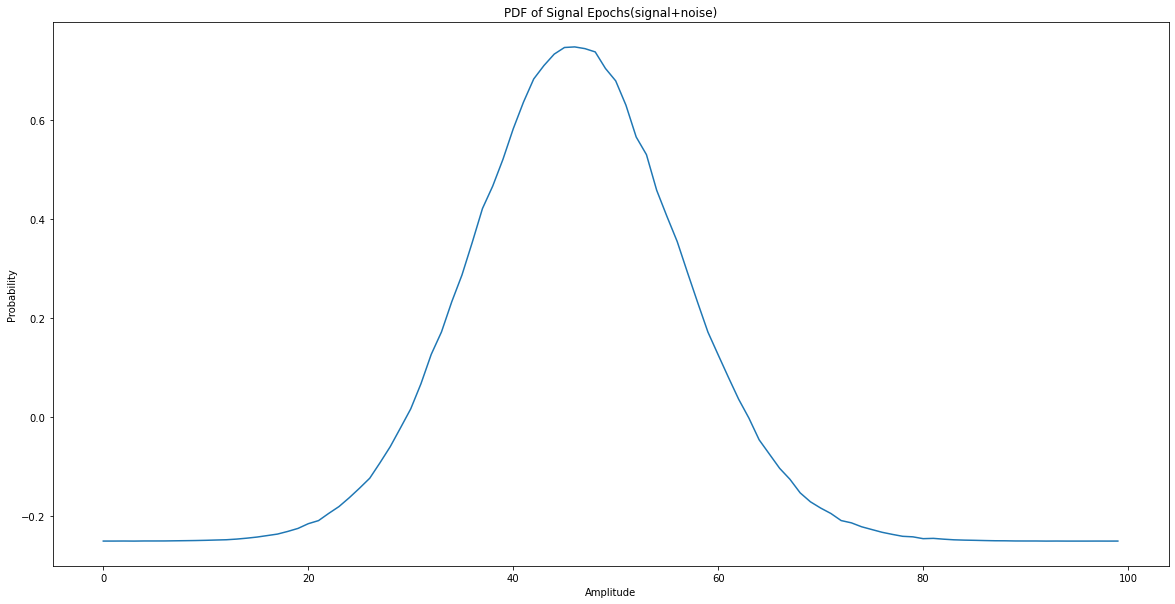

In [212]:
n3,bins=np.histogram((np.array(epochs).flatten()),bins=100)
plt.figure(figsize= (20, 10))
plt.plot(normalize(n3))
plt.xlabel('Amplitude')
plt.ylabel('Probability')
plt.title('PDF of Signal Epochs(signal+noise)')
plt.show()

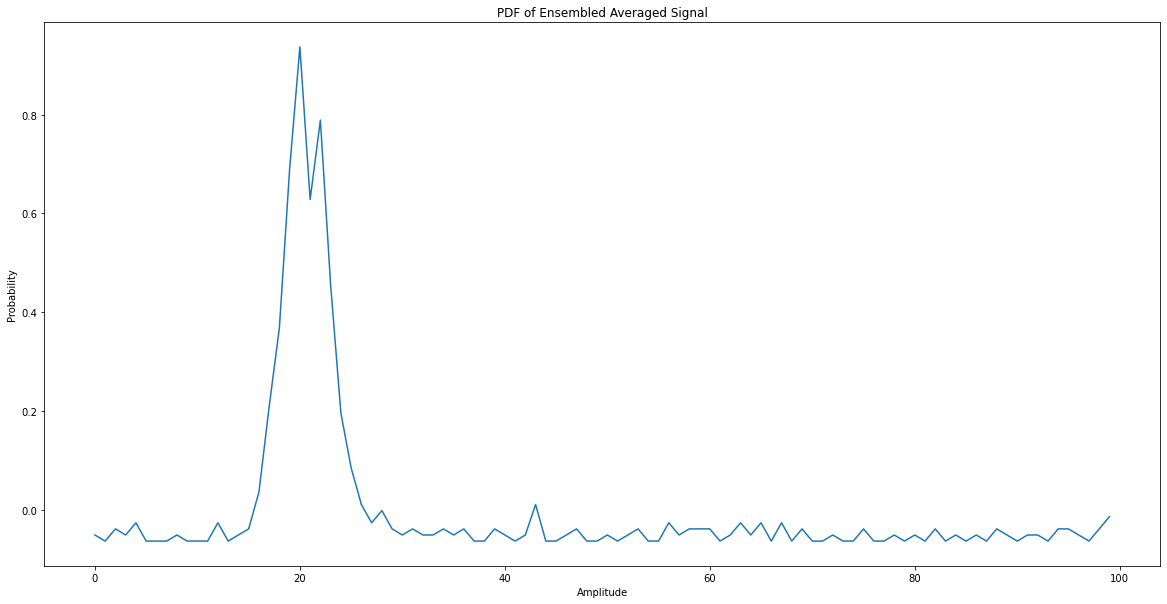

In [215]:
n4,bins=np.histogram((np.array(ensembled_average_signal).flatten()),bins=100)
plt.figure(figsize= (20, 10))
plt.plot(normalize(n4))
plt.xlabel('Amplitude')
plt.ylabel('Probability')
plt.title('PDF of Ensembled Averaged Signal')
plt.show()

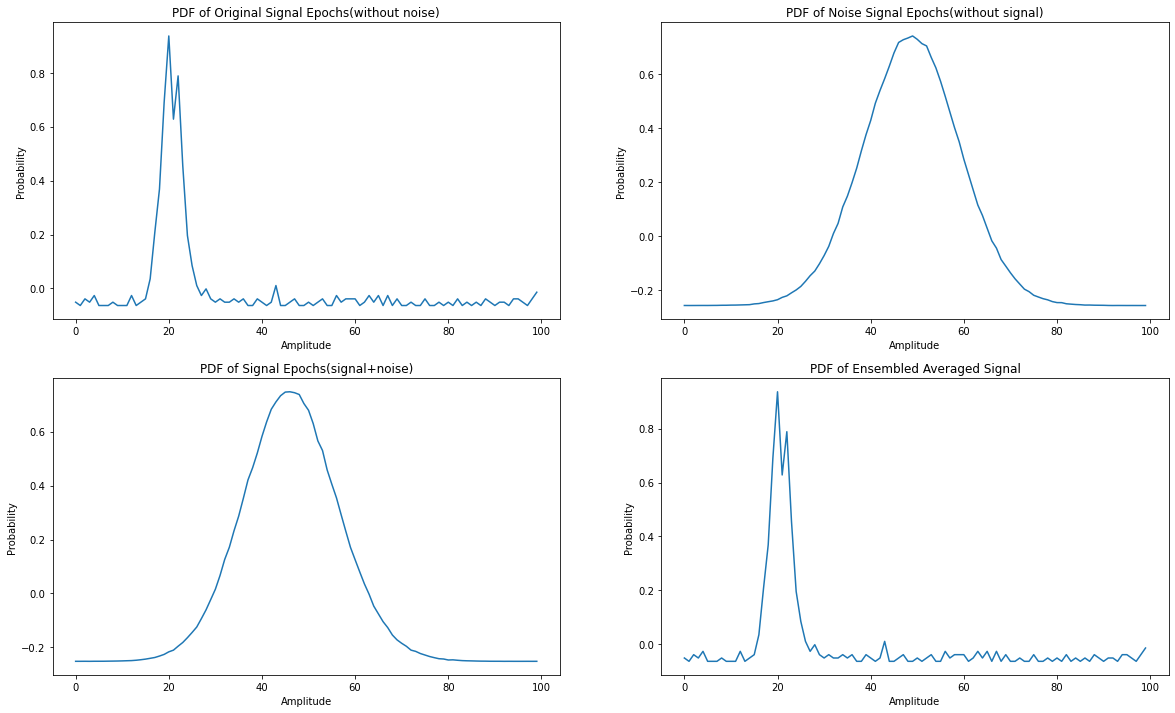

In [216]:
f ,ax = plt.subplots(2,2,figsize=(20,12))
ax[0,0].plot(normalize(n1))
ax[0,0].set_xlabel('Amplitude')
ax[0,0].set_ylabel('Probability')
ax[0,0].set_title('PDF of Original Signal Epochs(without noise)')
ax[0,1].plot(normalize(n2))
ax[0,1].set_xlabel('Amplitude')
ax[0,1].set_ylabel('Probability')
ax[0,1].set_title('PDF of Noise Signal Epochs(without signal)')
ax[1,0].plot(normalize(n3))
ax[1,0].set_xlabel('Amplitude')
ax[1,0].set_ylabel('Probability')
ax[1,0].set_title('PDF of Signal Epochs(signal+noise)')
ax[1,1].plot(normalize(n4))
ax[1,1].set_xlabel('Amplitude')
ax[1,1].set_ylabel('Probability')
ax[1,1].set_title('PDF of Ensembled Averaged Signal')
plt.show()

#### Here we observe that the pdf of signal epochs (signal + noise ) and noise signal are same and follow the normal distribution while the pdf of ensembled average signal is same as original signal without noise.

This shows that the signal epochs (signal + noise) are highly influenced by the noise content while the ensemble averaged signal contain very less noise and is more like original signal(without noise)

## (optional) Signal to Noise Ratio vs number of epochs

No handles with labels found to put in legend.


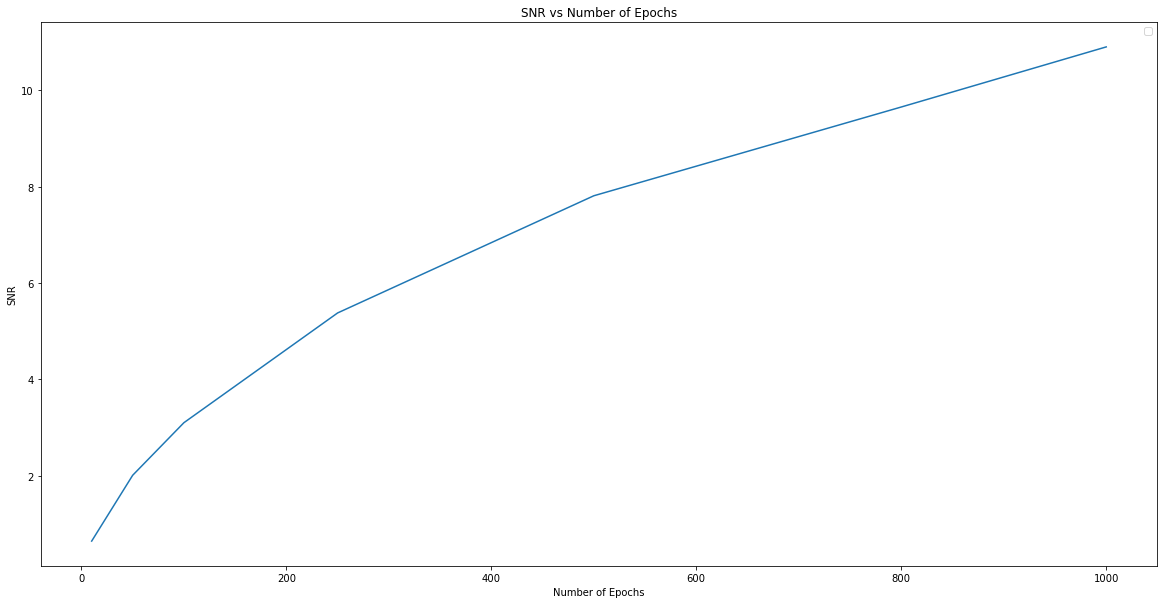

In [217]:
num_epoch = [10, 50, 100, 250, 500, 800, 1000]
snr =[]
plt.figure(figsize= (20, 10))
for i in range(0, len(num_epoch)):
    snr.append(SignalToNoiseRatio(ensemble_average(epochs, num_epoch[i]), num_epoch[i]))

plt.plot(num_epoch,snr) 
plt.legend()
plt.title("SNR vs Number of Epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("SNR")
plt.show()

We can observe that as the number of epochs increases the signal to noise ratio also increases. This means that for getting a better result with higher signal content and less noise we need to increase the number of epochs. SNR is directly proportional to square root of number of epochs for ensemble average signals. 